In [1]:
import numpy as np
import pandas as pd
from trading_env import *

In [2]:
# [done] test why random is +6 on average - buy/sell operation hold on average generates +
# [update] account class; interest rate
# [update] continuous2 and others
# [bugfix] trading env; reset initialization
# [results] td3 on average > random

# open close high low rsi macd volume

# implement render
# push code

In [3]:
# df = get_data('eth', '1h')
# df.to_csv('./data/eth_1h.csv', index=False)

In [4]:
df = pd.read_csv('./data/eth_1h.csv')

In [5]:
datafeed = df['close'].to_numpy()[::-1]

In [6]:
trainfeed = datafeed[:int(len(datafeed)*.8)]
testfeed = datafeed[int(len(datafeed)*.8):]

In [7]:
env_discrete = TradingEnvDiscrete(trainfeed, 24, 4, 100, 0, 100)
env_continuous = TradingEnvContinuous(trainfeed, 24, 4, 100, 100)
env_continuous2 = TradingEnvContinuous2(trainfeed, 24, 4, 100, 100)

In [8]:
# check if actions are truly random
# actions = []
# for i in range(1000):
#     actions.append(float(env_discrete.action_space.sample()))
# print(np.mean(actions))

In [9]:
# actions = []
# for i in range(1000):
#     actions.append(float(env_continuous.action_space.sample()))
# print(np.mean(actions))

In [10]:
# from account import *
# acc = Account(-100, interest=.1)
# acc.update_position('gme', -1, 100)

# print(acc.cash_balance, acc.asset_balance, acc.total_balance)

In [1]:
from RL.utils import train, test, plot

# Random

In [13]:
%%time
params = {'file_name':'random - discrete', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':0}
train('random', env_discrete, verbose=False, save_freq=100, save_dir='./experiments/', **params)

Wall time: 3.59 s


In [14]:
%%time
params = {'file_name':'random - continuous', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':0}
train('random', env_continuous, verbose=False, save_freq=100, save_dir='./experiments/', **params)

Wall time: 7.3 s


In [15]:
%%time
params = {'file_name':'random - continuous2', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':0}
train('random', env_continuous2, verbose=False, save_freq=100, save_dir='./experiments/', **params)

Wall time: 5.45 s


# DQN

In [16]:
%%time
params = {'file_name':'dqn - online, double, dueling, per', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':int(1e4),
          'online':True, 'gamma':.99, 'hidden_dim':32, 'learning_rate':1e-3, 'device':'cuda', 'dtype':'float32',
          'batch_size':32, 'clip':False, 'dueling':True, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':int(1e5), 'per':True, 'memory_alpha':.5, 'memory_beta':.4, 'target_update_freq':100}
train('dqn', env_discrete, verbose=True, save_freq=100, save_dir='./experiments/', **params)

{'file_name': 'dqn - online, double, dueling, per', 'max_steps': 100000, 'max_episode_steps': None, 'start_at': 10000, 'online': True, 'gamma': 0.99, 'hidden_dim': 32, 'learning_rate': 0.001, 'device': 'cuda', 'dtype': 'float32', 'batch_size': 32, 'clip': False, 'dueling': True, 'epsilon': 1.0, 'epsilon_min': 0.05, 'epsilon_decay': 0.99, 'memory_maxlen': 100000, 'per': True, 'memory_alpha': 0.5, 'memory_beta': 0.4, 'target_update_freq': 100}
{'episode': 1, 't_ep': 100, 't_total': 100, 'sum_reward': -68.26505645294557, 'optim_steps': 0, 'memory': 100}
{'episode': 2, 't_ep': 100, 't_total': 200, 'sum_reward': -79.27608176778875, 'optim_steps': 0, 'memory': 200}
{'episode': 3, 't_ep': 100, 't_total': 300, 'sum_reward': -52.45984257946776, 'optim_steps': 0, 'memory': 300}
{'episode': 4, 't_ep': 100, 't_total': 400, 'sum_reward': -339.8790304371514, 'optim_steps': 0, 'memory': 400}
{'episode': 5, 't_ep': 100, 't_total': 500, 'sum_reward': -241.14723269252886, 'optim_steps': 0, 'memory': 500

# TD3

In [17]:
%% 
params = {'file_name':'td3', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':int(1e4),
          'gamma':.99, 'hidden_dim':128, 'learning_rate':1e-3, 'device':'cuda', 'dtype':'float32',
          'batch_size':100, 'expl_noise':.1, 'memory_maxlen':int(1e5), 'noise_clip':.5, 'policy_freq':2, 'policy_noise':.2, 'tau':.005}
train('td3', env_continuous, verbose=True, save_freq=100, save_dir='./experiments/', **params)

{'file_name': 'td3', 'max_steps': 100000, 'max_episode_steps': None, 'start_at': 10000, 'gamma': 0.99, 'hidden_dim': 128, 'learning_rate': 0.001, 'device': 'cuda', 'dtype': 'float32', 'batch_size': 100, 'expl_noise': 0.1, 'memory_maxlen': 100000, 'noise_clip': 0.5, 'policy_freq': 2, 'policy_noise': 0.2, 'tau': 0.005}
{'episode': 1, 't_ep': 100, 't_total': 100, 'sum_reward': -3.0311686378582436, 'optim_steps': 0, 'memory': 100}
{'episode': 2, 't_ep': 100, 't_total': 200, 'sum_reward': 10.386927323732465, 'optim_steps': 0, 'memory': 200}
{'episode': 3, 't_ep': 100, 't_total': 300, 'sum_reward': 19.677965734412666, 'optim_steps': 0, 'memory': 300}
{'episode': 4, 't_ep': 100, 't_total': 400, 'sum_reward': 1.6319115694182074, 'optim_steps': 0, 'memory': 400}
{'episode': 5, 't_ep': 100, 't_total': 500, 'sum_reward': 6.104145586850066, 'optim_steps': 0, 'memory': 500}
{'episode': 6, 't_ep': 100, 't_total': 600, 'sum_reward': -12.24361857676297, 'optim_steps': 0, 'memory': 600}
{'episode': 7, 

In [18]:
%%time
params = {'file_name':'td3 - 2', 'max_steps':int(1e5), 'max_episode_steps':None, 'start_at':int(1e4),
          'gamma':.99, 'hidden_dim':128, 'learning_rate':1e-3, 'device':'cuda', 'dtype':'float32',
          'batch_size':100, 'expl_noise':.1, 'memory_maxlen':int(1e5), 'noise_clip':.5, 'policy_freq':2, 'policy_noise':.2, 'tau':.005}
train('td3', env_continuous2, verbose=True, save_freq=100, save_dir='./experiments/', **params)

{'file_name': 'td3 - 2', 'max_steps': 100000, 'max_episode_steps': None, 'start_at': 10000, 'gamma': 0.99, 'hidden_dim': 128, 'learning_rate': 0.001, 'device': 'cuda', 'dtype': 'float32', 'batch_size': 100, 'expl_noise': 0.1, 'memory_maxlen': 100000, 'noise_clip': 0.5, 'policy_freq': 2, 'policy_noise': 0.2, 'tau': 0.005}
{'episode': 1, 't_ep': 100, 't_total': 100, 'sum_reward': -176.56361516057518, 'optim_steps': 0, 'memory': 100}
{'episode': 2, 't_ep': 100, 't_total': 200, 'sum_reward': 8.795828706137721, 'optim_steps': 0, 'memory': 200}
{'episode': 3, 't_ep': 100, 't_total': 300, 'sum_reward': 233.78923002084696, 'optim_steps': 0, 'memory': 300}
{'episode': 4, 't_ep': 100, 't_total': 400, 'sum_reward': -25.31207443285726, 'optim_steps': 0, 'memory': 400}
{'episode': 5, 't_ep': 100, 't_total': 500, 'sum_reward': 39.66403303610153, 'optim_steps': 0, 'memory': 500}
{'episode': 6, 't_ep': 100, 't_total': 600, 'sum_reward': -27.69995290618388, 'optim_steps': 0, 'memory': 600}
{'episode': 

# Eval

File 0
Optimizer Steps 89900
{
  "file_name": "dqn - online, double, dueling, per",
  "max_steps": 100000,
  "max_episode_steps": null,
  "start_at": 10000,
  "online": true,
  "gamma": 0.99,
  "hidden_dim": 32,
  "learning_rate": 0.001,
  "device": "cuda",
  "dtype": "float32",
  "batch_size": 32,
  "clip": false,
  "dueling": true,
  "epsilon": 1.0,
  "epsilon_min": 0.05,
  "epsilon_decay": 0.99,
  "memory_maxlen": 100000,
  "per": true,
  "memory_alpha": 0.5,
  "memory_beta": 0.4,
  "target_update_freq": 100
}
-------------
File 1
Optimizer Steps 0
{
  "file_name": "random - continuous",
  "max_steps": 100000,
  "max_episode_steps": null,
  "start_at": 0
}
-------------
File 2
Optimizer Steps 0
{
  "file_name": "random - continuous2",
  "max_steps": 100000,
  "max_episode_steps": null,
  "start_at": 0
}
-------------
File 3
Optimizer Steps 0
{
  "file_name": "random - discrete",
  "max_steps": 100000,
  "max_episode_steps": null,
  "start_at": 0
}
-------------
File 4
Optimizer Step

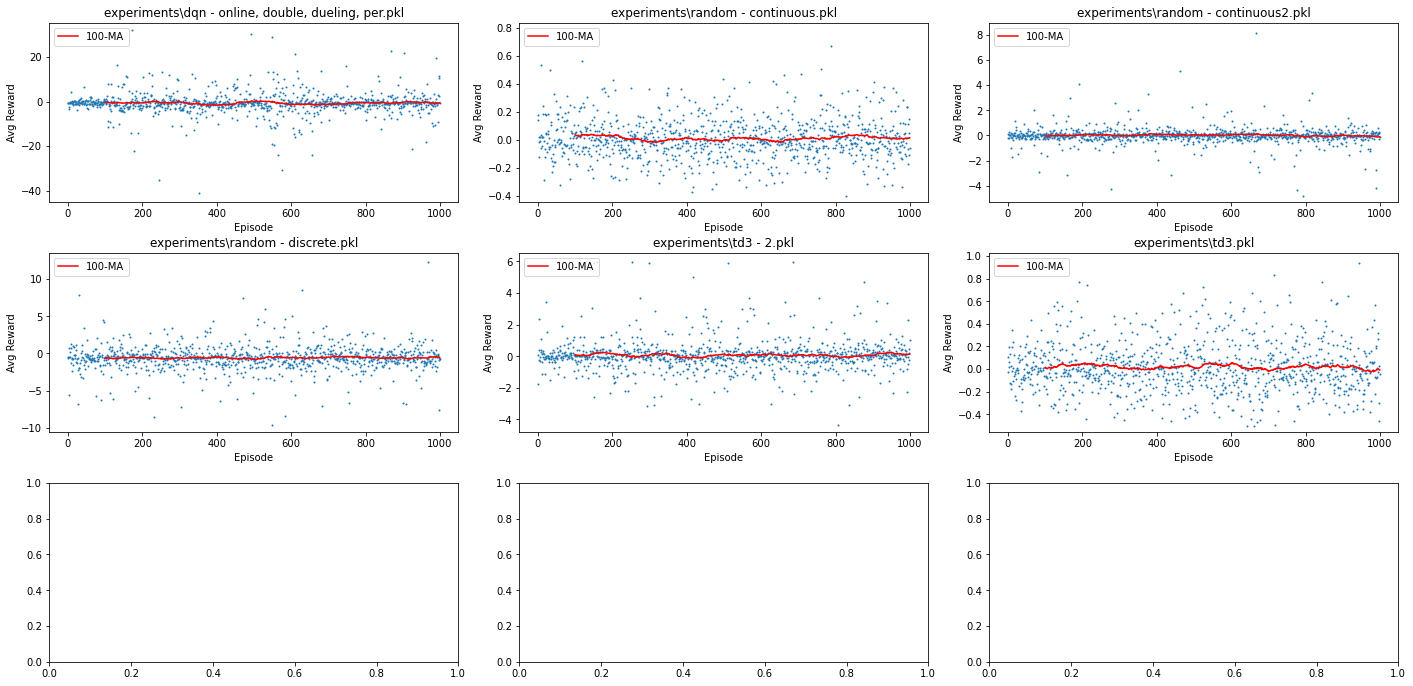

In [2]:
plot('./experiments/', ep_avg=True, ma_len=100, verbose=True)

In [20]:
env_discrete  = TradingEnvDiscrete(testfeed, 24, 4, 100, 0, 100)
env_continuous = TradingEnvContinuous(testfeed, 24, 4, 100, 100)
env_continuous2 = TradingEnvContinuous2(testfeed, 24, 4, 100, 100)

In [21]:
rewards_discrete = test('./experiments/random - discrete.pkl', None, env_discrete, 1000)
np.mean(rewards_discrete)

-44.6799935597121

In [25]:
rewards_dqn = test('./experiments/dqn - online, double, dueling, per.pkl', './experiments/dqn - online, double, dueling, per.pth', env_discrete, 1000)
np.mean(rewards_dqn)

23.20332932924032

In [22]:
rewards_continuous = test('./experiments/random - continuous.pkl', None, env_continuous, 1000)
np.mean(rewards_continuous)

6.1450973756538385

In [23]:
rewards_td3 = test('./experiments/td3.pkl', './experiments/td3.pth', env_continuous, 1000)
np.mean(rewards_td3)

Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficie

12.073119089919402

In [26]:
rewards_continuous2 = test('./experiments/random - continuous.pkl', None, env_continuous2, 1000)
np.mean(rewards_continuous2)

3.6781629058334646

In [24]:
rewards_td32 = test('./experiments/td3 - 2.pkl', './experiments/td3 - 2.pth', env_continuous2, 1000)
np.mean(rewards_td32)

Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficient Cash
Insufficie

88.88791115398055